<a href="https://colab.research.google.com/github/ayushmahli/Data-science-notebook/blob/main/HistoricalStock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance
!pip install beautifulsoup4
!pip install lxml


In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests


# Question 1: Tesla Stock Data

In [5]:
tesla = yf.Ticker("TSLA")
tesla_stock = tesla.history(period="max")
tesla_stock.reset_index(inplace=True)


# Question 2: Tesla Revenue Data via Web Scraping

In [6]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")

tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for row in soup.find_all("tr"):
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")
        if revenue != "":
            tesla_revenue = tesla_revenue.append({"Date": date, "Revenue": revenue}, ignore_index=True)

tesla_revenue.dropna(inplace=True)


 # Question 3: GameStop Stock Data

In [7]:
gme = yf.Ticker("GME")
gme_stock = gme.history(period="max")
gme_stock.reset_index(inplace=True)

# Question 4: GameStop Revenue Data

In [8]:
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")

gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for row in soup.find_all("tr"):
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")
        if revenue != "":
            gme_revenue = gme_revenue.append({"Date": date, "Revenue": revenue}, ignore_index=True)

gme_revenue.dropna(inplace=True)

# Question 5: Tesla Dashboard

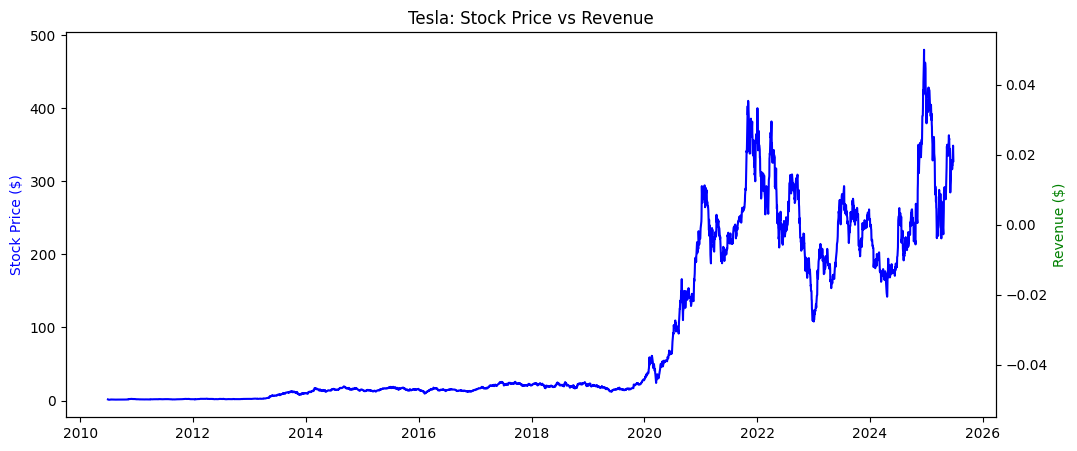

In [9]:
tesla_stock['Date'] = pd.to_datetime(tesla_stock['Date'])
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])

fig, ax1 = plt.subplots(figsize=(12, 5))
ax1.plot(tesla_stock['Date'], tesla_stock['Close'], label="Stock Price", color='blue')
ax1.set_ylabel("Stock Price ($)", color='blue')
plt.title("Tesla: Stock Price vs Revenue")

ax2 = ax1.twinx()
tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"])
ax2.plot(tesla_revenue['Date'], tesla_revenue['Revenue'], label="Revenue", color='green')
ax2.set_ylabel("Revenue ($)", color='green')
plt.show()


# Question 6: GameStop Dashboard

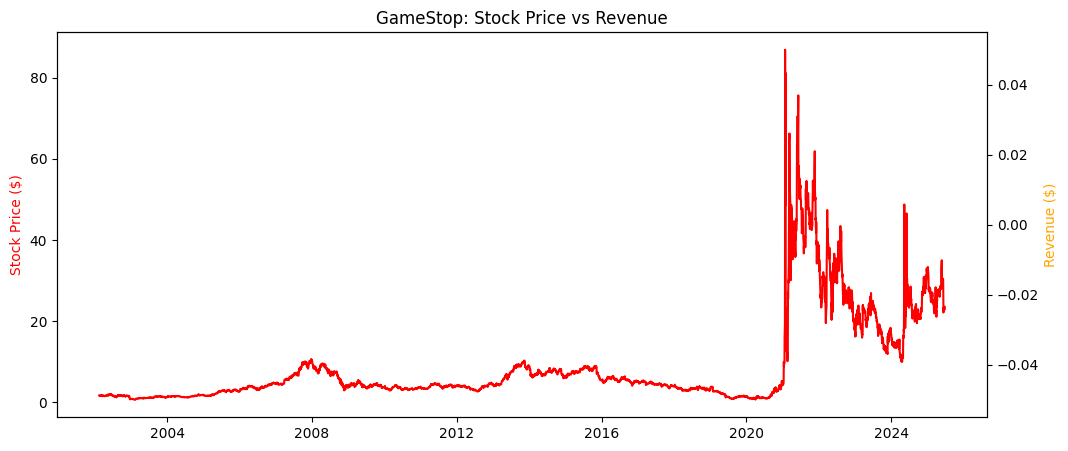

In [10]:
gme_stock['Date'] = pd.to_datetime(gme_stock['Date'])
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])

fig, ax1 = plt.subplots(figsize=(12, 5))
ax1.plot(gme_stock['Date'], gme_stock['Close'], label="Stock Price", color='red')
ax1.set_ylabel("Stock Price ($)", color='red')
plt.title("GameStop: Stock Price vs Revenue")

ax2 = ax1.twinx()
gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"])
ax2.plot(gme_revenue['Date'], gme_revenue['Revenue'], label="Revenue", color='orange')
ax2.set_ylabel("Revenue ($)", color='orange')
plt.show()